In [1]:
import vm_tools as vmt
import fakedata as fd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Failed to import:
No module named 'hyperopt'
No generalized Tikhonov fit available for regression


In [68]:
from scipy.stats import zscore

In [114]:
n_voxels = 2400
n_tps = 1200
n_channels = 438
signal = np.random.randn(n_voxels) * 0.05 + 0.7
X = np.random.randn(n_tps, n_channels)
B = np.random.randn(n_channels, n_voxels)
Y = fd.from_x(X, B, signal_corr=signal)
Y_hat = zscore(X.dot(B), axis=0)
cc = vmt.Stats.utils.column_corr(Y, Y_hat)

In [115]:
np.max(cc)

0.8862495740870704

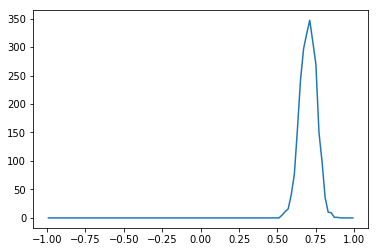

In [116]:
vmt.plot_utils.histline(cc, bins=np.linspace(-1,1, 101))

In [117]:
from scipy.spatial import distance as scid

In [118]:
n_tps

1200

In [119]:
Y.shape

(1200, 2400)

In [128]:
dst = vmt.decode._compute_confmat_mahal(Y[:1000], Y_hat[:1000], Y[1000:], Y_hat[1000:], alpha=1)

In [129]:
Y_hat[1000:].shape

(200, 2400)

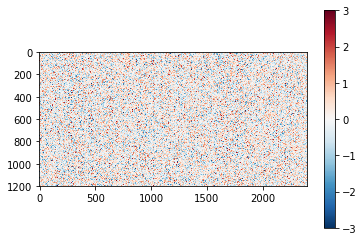

In [130]:
plt.imshow(Y-Y_hat, vmin=-3, vmax=3, cmap='RdBu_r')
plt.colorbar()

In [131]:
acc2, dst2 = vmt.decode.decode_dst(Y[1000:], Y_hat[1000:])

In [132]:
acc2

[1.0, 1.0, 1.0]

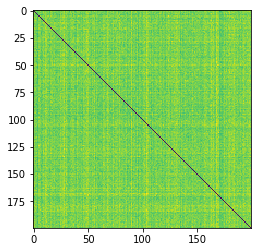

In [133]:
plt.imshow(dst2)

In [134]:
dst.shape

(200, 200)

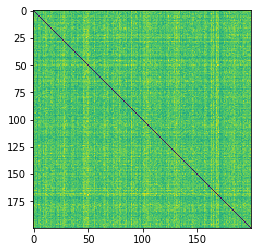

In [135]:
plt.imshow(dst)

In [136]:
pct_corr = vmt.decode.acc_fromconfmat(dst, acc_thresh=1)

In [137]:
pct_corr

1.0